In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/height-of-male-and-female-by-country-2022/Height of Male and Female by Country 2022.csv


# Data Extraction

In [2]:
df = pd.read_csv('/kaggle/input/height-of-male-and-female-by-country-2022/Height of Male and Female by Country 2022.csv')
df.head()

,Rank,Country Name,Male Height in Cm,Female Height in Cm,Male Height in Ft,Female Height in Ft
0,1,Netherlands,183.78,170.36,6.03,5.59
1,2,Montenegro,183.30,169.96,6.01,5.58
2,3,Estonia,182.79,168.66,6.00,5.53
3,4,Bosnia and Herzegovina,182.47,167.47,5.99,5.49
4,5,Iceland,182.10,168.91,5.97,5.54


# Exploratory Data Analysis (EDA)

In [3]:
#describe all columns
df.describe(include = 'object')

,Country Name
count,199
unique,199
top,Netherlands
freq,1


In [4]:
#check the shape of dataset
df.shape

(199, 6)

In [5]:
#check all columns
df.columns

Index(['Rank', 'Country Name', 'Male Height in Cm', 'Female Height in Cm',
       'Male Height in Ft', 'Female Height in Ft'],
      dtype='object')

In [6]:
#check type of dataset
df.dtypes

Rank                     int64
Country Name            object
Male Height in Cm      float64
Female Height in Cm    float64
Male Height in Ft      float64
Female Height in Ft    float64
dtype: object

In [7]:
#check missing value of dataset
df.isnull().sum()

Rank                   0
Country Name           0
Male Height in Cm      0
Female Height in Cm    0
Male Height in Ft      0
Female Height in Ft    0
dtype: int64

In [8]:
# Drop any duplicate records
df.drop_duplicates(subset='Country Name', inplace=True)
df.shape

(199, 6)

The information in "Cm" is the same of the information in "Ft", therefore we'll drop the "Ft"s columns

In [9]:
df.drop(['Male Height in Ft','Female Height in Ft'], axis=1, inplace=True)
df.head()

,Rank,Country Name,Male Height in Cm,Female Height in Cm
0,1,Netherlands,183.78,170.36
1,2,Montenegro,183.30,169.96
2,3,Estonia,182.79,168.66
3,4,Bosnia and Herzegovina,182.47,167.47
4,5,Iceland,182.10,168.91


In [10]:
new_df = df.iloc[:,1::]
#check correlation of each variable
new_df.corr()


,Male Height in Cm,Female Height in Cm
Male Height in Cm,1.000000,0.928787
Female Height in Cm,0.928787,1.000000


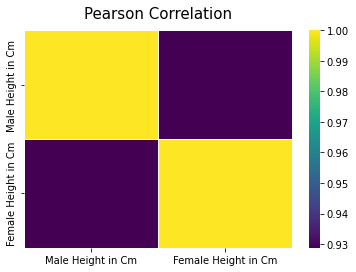

In [11]:
#visualize correlation of each variable using pearson correlation
sns.heatmap(new_df.corr(), vmax = 1, linewidths = 0.9, cmap = 'viridis')
plt.title('Pearson Correlation', fontsize = 15, pad = 12)
plt.show()

# **Países com maior altura entre os homens:**

**5 países com maior altura entre os homens**

,Rank,Country Name,Male Height in Cm
0,1,Netherlands,183.78
1,2,Montenegro,183.30
2,3,Estonia,182.79
3,4,Bosnia and Herzegovina,182.47
4,5,Iceland,182.10


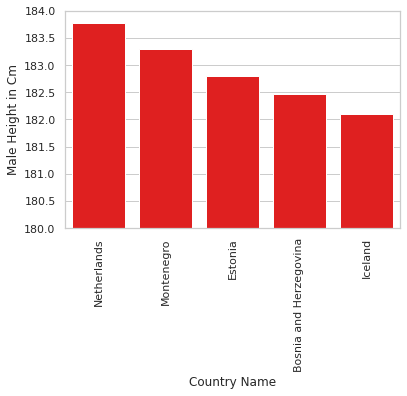

In [12]:
hightest_male = df.drop('Female Height in Cm',axis=1)
hightest_male = hightest_male.sort_values(by=['Male Height in Cm'],ascending=False)
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=hightest_male["Country Name"][:5], y=hightest_male["Male Height in Cm"][:5], data=hightest_male,color='red')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.ylim(ymin=180,ymax=184)
hightest_male.head()

# **Países com maior altura entre as mulheres:**

**5 países com maior altura entre as mulheres**

,Rank,Country Name,Female Height in Cm
0,1,Netherlands,170.36
1,2,Montenegro,169.96
5,6,Denmark,169.47
4,5,Iceland,168.91
7,8,Latvia,168.81


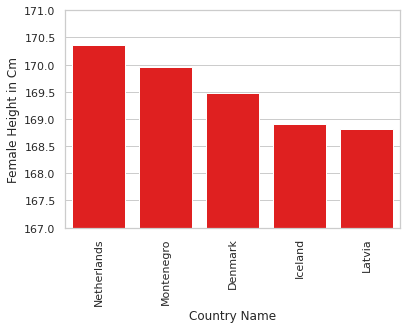

In [13]:
hightest_female = df.drop('Male Height in Cm',axis=1)
hightest_female = hightest_female.sort_values(by=['Female Height in Cm'],ascending=False)
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=hightest_female["Country Name"][:5], y=hightest_female["Female Height in Cm"][:5], data=hightest_female,color='red')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.ylim(ymin=167,ymax=171)
hightest_female.head()

# **Países com menor altura entre os homens:**

**5 países com menor altura entre os homens**

,Rank,Country Name,Male Height in Cm
198,199,Timor-Leste,160.13
197,198,Laos,162.78
196,197,Solomon Islands,163.07
195,196,Papua New Guinea,163.10
194,195,Mozambique,164.30


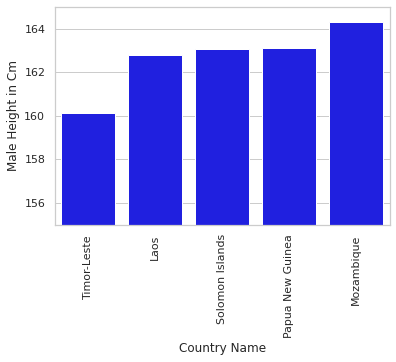

In [14]:
shortest_male = df.drop('Female Height in Cm',axis=1)
shortest_male = shortest_male.sort_values(by=['Male Height in Cm'],ascending=True)
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=shortest_male["Country Name"][:5], y=shortest_male["Male Height in Cm"][:5], data=shortest_male,color='blue')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.ylim(ymin=155,ymax=165)
shortest_male.head()

# **Países com menor altura entre as mulheres:**

**5 países com menor altura entre as mulheres**

,Rank,Country Name,Female Height in Cm
193,194,Guatemala,150.91
190,191,Bangladesh,152.38
192,193,Nepal,152.39
198,199,Timor-Leste,152.71
189,190,Madagascar,153.06


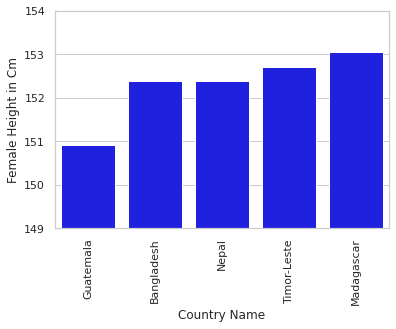

In [15]:
shortest_female = df.drop('Male Height in Cm',axis=1)
shortest_female = shortest_female.sort_values(by=['Female Height in Cm'],ascending=True)
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=shortest_female["Country Name"][:5], y=shortest_female["Female Height in Cm"][:5], data=shortest_female,color='blue')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.ylim(ymin=149,ymax=154)
shortest_female.head()

# **Altura Média entre os Países:**

In [16]:
df['Mean Height in Cm'] = 0.5*(df['Male Height in Cm']+df['Female Height in Cm'])
df.head()

,Rank,Country Name,Male Height in Cm,Female Height in Cm,Mean Height in Cm
0,1,Netherlands,183.78,170.36,177.070
1,2,Montenegro,183.30,169.96,176.630
2,3,Estonia,182.79,168.66,175.725
3,4,Bosnia and Herzegovina,182.47,167.47,174.970
4,5,Iceland,182.10,168.91,175.505


In [17]:
df.head()

,Rank,Country Name,Male Height in Cm,Female Height in Cm,Mean Height in Cm
0,1,Netherlands,183.78,170.36,177.070
1,2,Montenegro,183.30,169.96,176.630
2,3,Estonia,182.79,168.66,175.725
3,4,Bosnia and Herzegovina,182.47,167.47,174.970
4,5,Iceland,182.10,168.91,175.505


**5 países com maior altura média**

,Rank,Country Name,Male Height in Cm,Female Height in Cm,Mean Height in Cm
0,1,Netherlands,183.78,170.36,177.070
1,2,Montenegro,183.30,169.96,176.630
2,3,Estonia,182.79,168.66,175.725
5,6,Denmark,181.89,169.47,175.680
4,5,Iceland,182.10,168.91,175.505


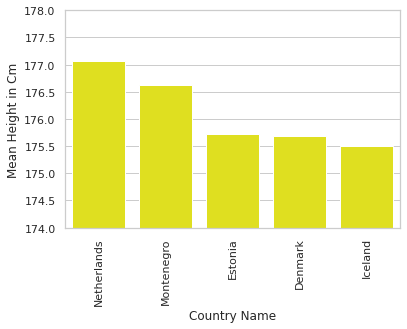

In [18]:
mean_height = df
mean_height = mean_height.sort_values(by=['Mean Height in Cm'],ascending=False)
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=mean_height["Country Name"][:5], y=mean_height["Mean Height in Cm"][:5], data=hightest_male,color='yellow')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.ylim(ymin=174,ymax=178)
mean_height.head()

**5 países com menor altura média**

,Rank,Country Name,Male Height in Cm,Female Height in Cm,Mean Height in Cm
198,199,Timor-Leste,160.13,152.71,156.420
193,194,Guatemala,164.36,150.91,157.635
197,198,Laos,162.78,153.10,157.940
192,193,Nepal,164.36,152.39,158.375
190,191,Bangladesh,165.08,152.38,158.730


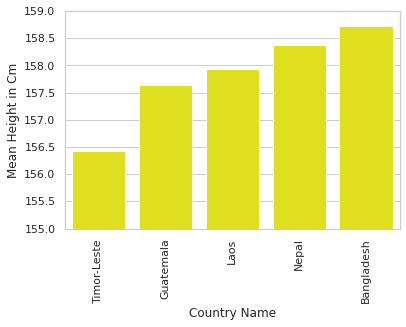

In [19]:
mean_height = mean_height.sort_values(by=['Mean Height in Cm'],ascending=True)
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=mean_height["Country Name"][:5], y=mean_height["Mean Height in Cm"][:5], data=hightest_male,color='yellow')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.ylim(ymin=155,ymax=159)
mean_height.head()

**Conclusions on my goals**

* Netherlands is the country with the tallest average height of both Male and Female;
* Montenegro is the country with second tallest average height of both Male and Female;
* Timor-Leste is the country with the shortest average height of Male and it's in the the TOP 5 of countries with the shortest average height of Female;
* Guatemala is the country with the shortest average height of Female;
* The tallest countries are mostly from Europe;
* The shortest countries are mostly from Asia;

In [20]:
#profile report of dataset
ProfileReport(df)

Summarize dataset:   0%|          | 0/18 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]